# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [2]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

In [4]:
!pip install geoviews

     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------------------------------------ --- 51.2/56.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 725.9 kB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/563.2 kB ? eta -:--:--
   ---- ----------------------------------- 61.4/563.2 kB 1.1 MB/s eta 0:00:01
   -------- ------------------------------- 122.9/563.2 kB 1.2 MB/s eta 0:00:01
   ------------ --------------------------- 174.1/563.2 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 235.5/563.2 kB 1.2 MB/s eta 0:00:01
   --------------------- ------------------ 297.0/563.2 kB 1.2 MB/s eta 0:00:01
   -------------------------- ------------- 368.6/563.2 kB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 440.3/563.2 kB 1.4 MB/s eta 0:00

In [3]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,yellowknife,62.4560,-114.3525,53.37,96,100,17.27,CA,1726514040
1,1,tiksi,71.6872,128.8694,33.98,94,100,14.63,RU,1726514041
2,2,lompoc,34.6391,-120.4579,65.89,66,100,14.97,US,1726513954
3,3,bethel,41.3712,-73.4140,76.28,42,0,4.61,US,1726514043
4,4,invercargill,-46.4000,168.3500,37.02,89,100,8.99,NZ,1726514045


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
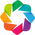

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity)

In [4]:
%%capture --no-display

# Configure the map plot
import geoviews as gv
import holoviews as hv
from geoviews import opts
from geoviews.tile_sources import EsriImagery
# Enable Holoviews extension
hv.extension('bokeh')

# Plot map with cities
points = gv.Points(city_data_df, ['Lng', 'Lat'], ['City', 'Humidity'])
# Display the map
gv.tile_sources.EsriImagery * points.opts(
    opts.Points(size=5, color='Humidity', cmap='Viridis', tools=['hover'], 
                width=800, height=600, title="City Humidity on World Map"))

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [6]:
# Narrow down cities that fit criteria and drop any results with null values
ideal_cities_df = city_data_df[
    (city_data_df['Max Temp'] > 10) & 
    (city_data_df['Max Temp'] < 35) & 
    (city_data_df['Wind Speed'] < 8) & 
    (city_data_df['Cloudiness'] < 50)
]
# Drop any rows with null values
ideal_cities_df = ideal_cities_df.dropna()

# Display sample data
ideal_cities_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
32,32,susuman,62.7833,148.1667,28.09,82,21,2.59,RU,1726514077
79,79,suntar,62.1444,117.6319,29.52,94,16,4.94,RU,1726514129
146,146,dubbo,-32.2500,148.6167,33.93,93,0,3.44,AU,1726514166
297,297,olyokminsk,60.3736,120.4264,31.32,91,16,3.33,RU,1726514371
400,400,mundybash,53.2110,87.2983,32.29,97,19,2.13,RU,1726514488


### Step 3: Create a new DataFrame called `hotel_df`.

In [7]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = ideal_cities_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = ""

# Display sample data
hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
32,susuman,RU,62.7833,148.1667,82,
79,suntar,RU,62.1444,117.6319,94,
146,dubbo,AU,-32.2500,148.6167,93,
297,olyokminsk,RU,60.3736,120.4264,91,
400,mundybash,RU,53.2110,87.2983,97,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [17]:
# Set parameters to search for a hotel
radius = 10000  # 10,000 meters is the radius we're using
params = {"categories": "accommodation.hotel",
    "limit": 1,
    "apiKey": "ffb867b6ca324236b4d561f35050281d"

}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get Latitude, Longitude from the DataFrame
    lat = row['Lat']
    lng = row['Lng']
    
    # Add the current city's Latitude and Longitude to the params dictionary
    params = {
    "categories": "accommodation.hotel",
    "filter": f"circle:{lng},{lat},20000",  # Increased to 20,000 meters
    "bias": f"proximity:{lng},{lat}",
    "limit": 1,
    "apiKey": "ffb867b6ca324236b4d561f35050281d"

}
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"
    
    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params).json()
    # Print the full API response for each city
    print(response)  # <-- Add this line to inspect the full response

    # Convert the API response to JSON format
    name_address = response
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, 'Hotel Name'] = response['features'][0]['properties']['name']
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found"
        hotel_df.loc[index, 'Hotel Name'] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")
    
# Display sample data
hotel_df.head()

Starting hotel search
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'country': 'Russia', 'country_code': 'ru', 'region': 'Far Eastern Federal District', 'state': 'Magadan Oblast', 'county': 'Susumansky Urban District', 'city': 'Susuman', 'postcode': '686310', 'street': 'улица Билибина', 'lon': 148.1511226, 'lat': 62.7767388, 'formatted': 'улица Билибина, Susuman, Magadan Oblast, Russia, 686310', 'address_line1': 'улица Билибина', 'address_line2': 'Susuman, Magadan Oblast, Russia, 686310', 'categories': ['accommodation', 'accommodation.hotel'], 'details': [], 'datasource': {'sourcename': 'openstreetmap', 'attribution': '© OpenStreetMap contributors', 'license': 'Open Database License', 'url': 'https://www.openstreetmap.org/copyright', 'raw': {'osm_id': 644293626, 'tourism': 'hotel', 'osm_type': 'n'}}, 'distance': 1080, 'place_id': '51f81510ffd584624059403d522d6c634f40f00103f901fa23672600000000'}, 'geometry': {'type': 'Point', 'coordinates': [148.1511226, 

,City,Country,Lat,Lng,Humidity,Hotel Name
32,susuman,RU,62.7833,148.1667,82,No hotel found
79,suntar,RU,62.1444,117.6319,94,No hotel found
146,dubbo,AU,-32.2500,148.6167,93,Blue Gum Motel
297,olyokminsk,RU,60.3736,120.4264,91,Колос
400,mundybash,RU,53.2110,87.2983,97,No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [18]:
%%capture --no-display

# Configure the map plot
hotel_points = gv.Points(hotel_df, ['Lng', 'Lat'], ['City', 'Country', 'Hotel Name', 'Humidity'])

# Display the map
gv.tile_sources.EsriImagery * hotel_points.opts(
    opts.Points(size='Humidity', color='Humidity', cmap='Viridis', tools=['hover'], 
                width=800, height=600, title="Vacation Destinations with Hotels"))


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Country,Hotel Name,Humidity)